# On The Interaction of Gravitational Waves with Magnetic and Electric Fields by Barrabes & Hogan
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Day AND Launch of JWST

There are quite a few metrics in this paper, here we find the field equations for the metric given as equation 2.5

TO DO:  Add 2.1 and 3.1 metrics 

https://arxiv.org/abs/1003.0571

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,rho,phi,z,du,drho,dphi,dz = symbols('u rho phi z du drho dphi dz')

In [4]:
k = Function('k')(rho,u)
k

In [5]:
U = Function('U')(rho,u)
U

In [6]:
variables = Matrix( [u,rho,phi,z] )
variables

⎡u⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [du,drho,dphi,dz])
differentials

⎡ du ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = exp(2*(k-U)) * du**2 + (2*exp(2*(k-U))*du*drho)  - exp(2*U) * dz**2 - rho**2 * exp(-2*U)* dphi**2 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ -2⋅U(ρ, u) + 2⋅k(ρ, u)   -2⋅U(ρ, u) + 2⋅k(ρ, u)                              ⎤
⎢ℯ                        ℯ                               0              0     ⎥
⎢                                                                              ⎥
⎢ -2⋅U(ρ, u) + 2⋅k(ρ, u)                                                       ⎥
⎢ℯ                                   0                    0              0     ⎥
⎢                                                                              ⎥
⎢                                                    2  -2⋅U(ρ, u)             ⎥
⎢           0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                              ⎥
⎢                                                                     2⋅U(ρ, u)⎥
⎣           0                        0                    0         -ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ -2⋅U(ρ, u) + 2⋅k(ρ, u)   -2⋅U(ρ, u) + 2⋅k(ρ, u)                              ⎤
⎢ℯ                        ℯ                               0              0     ⎥
⎢                                                                              ⎥
⎢ -2⋅U(ρ, u) + 2⋅k(ρ, u)                                                       ⎥
⎢ℯ                                   0                    0              0     ⎥
⎢                                                                              ⎥
⎢                                                    2  -2⋅U(ρ, u)             ⎥
⎢           0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                              ⎥
⎢                                                                     2⋅U(ρ, u)⎥
⎣           0                        0                    0         -ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("u rho phi z")
u,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡∂               ∂             ∂               ∂                                           
⎢⎢──(U(ρ, u)) - 2⋅──(U(ρ, u)) - ──(k(ρ, u)) + 2⋅──(k(ρ, u))  0                   0          
⎢⎢∂ρ              ∂u            ∂ρ              ∂u                                          
⎢⎢                                                                                          
⎢⎢                            0                              0                   0          
⎢⎢                                                                                          
⎢⎢                                                                ⎛    ∂              ⎞  -2⋅
⎢⎢                            0                              0  ρ⋅⎜- ρ⋅──(U(ρ, u)) + 1⎟⋅ℯ   
⎢⎢                                                                ⎝    ∂ρ             ⎠     
⎢⎢                                                                    

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2                           2     2                 2                  2          ⎞ 
⎢  ⎜   ∂               ⎛∂          ⎞     ∂                 ∂                  ∂           ⎟ 
⎢ρ⋅⎜- ───(U(ρ, u)) - 2⋅⎜──(U(ρ, u))⎟  + ───(k(ρ, u)) + 2⋅─────(U(ρ, u)) - 2⋅─────(k(ρ, u))⎟ 
⎢  ⎜    2              ⎝∂u         ⎠      2              ∂u ∂ρ              ∂u ∂ρ         ⎟ 
⎢  ⎝  ∂ρ                                ∂ρ                                                ⎠ 
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                        ρ                  
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                    2              2                 

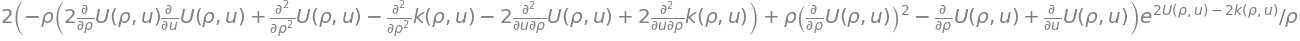

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛    ⎛                              2              2                 2                  2
⎢  ⎜    ⎜  ∂           ∂              ∂              ∂                 ∂                  ∂ 
⎢  ⎜- ρ⋅⎜2⋅──(U(ρ, u))⋅──(U(ρ, u)) + ───(U(ρ, u)) - ───(k(ρ, u)) - 2⋅─────(U(ρ, u)) + 2⋅────
⎢  ⎜    ⎜  ∂ρ          ∂u              2              2              ∂u ∂ρ              ∂u ∂
⎢  ⎝    ⎝                            ∂ρ             ∂ρ                                      
⎢- ─────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛  2                           2     2                 2                  2          ⎞ 
⎢    ⎜ ∂               ⎛∂          ⎞     ∂                 ∂                  ∂           ⎟ 
⎢- ρ⋅⎜───(U(ρ, u)) + 2⋅⎜──(U(ρ, u))⎟  - ───(k(ρ, u)) - 2⋅─────(U(ρ, u)) + 2⋅─────(k(ρ, u))⎟ 
⎢    ⎜  2              ⎝∂u         ⎠      2              ∂u ∂ρ              ∂u ∂ρ         ⎟ 
⎢    ⎝∂ρ                                ∂ρ                                                ⎠ 
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                        ρ                  
⎢                                                                                           
⎢    ⎛                                2              2                 2                  2 
⎢    ⎜    ∂           ∂              ∂              ∂                 ∂                  ∂  
⎢  ρ⋅⎜- 2⋅──(U(ρ, u))⋅──(U(ρ, u)) - ───(U(ρ, u)) + ───(k(ρ, u)) + 2⋅──

In [20]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                          ∂             ∂  
⎢               2                                                  2   1.0⋅──(k(ρ, u))   ──(
⎢  ⎛∂          ⎞        ∂           ∂                 ⎛∂          ⎞        ∂ρ            ∂u 
⎢- ⎜──(U(ρ, u))⎟  + 2.0⋅──(U(ρ, u))⋅──(U(ρ, u)) - 2.0⋅⎜──(U(ρ, u))⎟  + ─────────────── - ───
⎢  ⎝∂ρ         ⎠        ∂ρ          ∂u                ⎝∂u         ⎠           ρ             
⎢                                                                                           
⎢                                                       ∂                                   
⎢                                               2   1.0⋅──(k(ρ, u))                         
⎢                                  ⎛∂          ⎞        ∂ρ                                  
⎢                                - ⎜──(U(ρ, u))⎟  + ───────────────                         
⎢                                  ⎝∂ρ         ⎠           ρ          

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

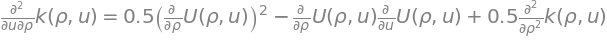

In [32]:
kWaveEquation = Eq(diff(k,rho,u),solve( einsteinSimplified[2,2].args[1], diff(k,rho,u) )[0])
kWaveEquation

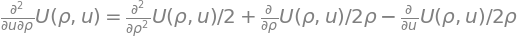

In [39]:
uWaveEquation = Eq(diff(U,u,rho), expand(solve( ricciSimplified[2,2].args[1], diff(U,u,rho) )[0]) ) 
uWaveEquation

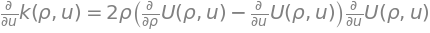

In [53]:
kuConstraint = Eq( diff(k,u),solve( simplify(ricciSimplified[0,0].args[1]-ricciSimplified[0,1].args[1]), diff(k,u) )[0])
kuConstraint

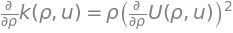

In [54]:
krhoConstraint = Eq( diff(k,rho),solve( ricciSimplified[1,1], diff(k,rho) )[0])
krhoConstraint

In [56]:
vacuumFieldEquations = Matrix([kWaveEquation,uWaveEquation,kuConstraint,krhoConstraint])
vacuumFieldEquations

⎡   2                              2                                   2         ⎤
⎢  ∂                  ⎛∂          ⎞    ∂           ∂                  ∂          ⎥
⎢─────(k(ρ, u)) = 0.5⋅⎜──(U(ρ, u))⎟  - ──(U(ρ, u))⋅──(U(ρ, u)) + 0.5⋅───(k(ρ, u))⎥
⎢∂u ∂ρ                ⎝∂ρ         ⎠    ∂ρ          ∂u                  2         ⎥
⎢                                                                    ∂ρ          ⎥
⎢                                                                                ⎥
⎢                              2                                                 ⎥
⎢                             ∂                                                  ⎥
⎢                            ───(U(ρ, u))   ∂             ∂                      ⎥
⎢              2               2            ──(U(ρ, u))   ──(U(ρ, u))            ⎥
⎢             ∂              ∂ρ             ∂ρ            ∂u                     ⎥
⎢           ─────(U(ρ, u)) = ──────────── + ─────────── - ───────────            ⎥
⎢   